In [1]:
import os
import math
import warnings
import numpy as np
import pandas as pd
from data.data import process_data
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [11]:
warnings.filterwarnings("ignore")

def MAPE(y_true, y_pred):
    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape

def plot_results(y_true, y_preds, names, steps):
    """Plot
    Plot the true data and predicted data.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 00:00'
    x = pd.date_range(d, periods=steps, freq='5min')

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true)
   
    plt.xticks([])
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    plt.show()
    fig.savefig('intro.png',dpi=600,format='png')


In [3]:
PATH1 = r"model" #模型存储路径
PATH2 = r"data" #数据集地址
DATASET = '1111565'    #数据集名称
FILE1 = PATH2 + os.sep + DATASET  + "train.csv"  #训练集path
FILE2 = PATH2 + os.sep + DATASET +  "test.csv"  #测试集path


dnn = load_model(PATH1 + os.sep + '1111565dnn.h5')
tcnlstm = load_model(PATH1 + os.sep + '1111565tcnlstm.h5')

models = [dnn, tcnlstm]
names = ['DNN', 'TCN-LSTM']


In [4]:
_, _, X_test, y_test, scaler = process_data(FILE1, FILE2, 48)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

In [6]:
y_preds = []
for name, model in zip(names, models):
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    predicted = model.predict(X_test)
    predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
    y_preds.append(predicted[:864])

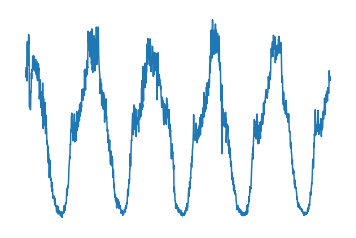

In [12]:
names = ['DCRNN', 'MDCNet']
plot_results(y_test[: 1440], [y_preds[i][132: 420] for i in range(2)], names, 1440)
